In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.feature_selection import RFE 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 


In [3]:
train=pd.read_csv("train.csv") #读取csv
test=pd.read_csv("test.csv")
Id = test['Id'] 


## EXPLORATORY DATA ANALYSIS

In [4]:
train.head() #截取一个列表、元组或字符串的开头元素

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head() #截取一个列表、元组或字符串的开头元素

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.shape  #获取表的行数和列数

(1460, 81)

In [7]:
test.shape #获取表的行数和列数

(1459, 80)

In [ ]:
train.columns #获取train里面的column name

In [ ]:
test.info() 

In [8]:

train.describe() #describe函数是pandas库中的一个函数，用于计算数据集的统计描述信息

#describe函数的描述结果包含了以下统计指标：
#count：非缺失值的数量。
#mean：平均值。
#std：标准差。
#min：最小值。
#25%：第一个四分位数，即25%的数据小于等于该值。
#50%：中位数，即50%的数据小于等于该值。
#75%：第三个四分位数，即75%的数据小于等于该值。
#max：最大值。

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180830.271233
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79556.667224
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,14750.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#处理NULL值
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#print(train.shape[0])
pd.set_option('display.max_rows', train.shape[0]) # 显示所有行 （train.shape[0]= rows count）
pd.DataFrame(train.isnull().sum().sort_values(ascending = False)) #

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [11]:
pd.set_option('display.max_rows', test.shape[0]) # 显示所有行
pd.DataFrame(test.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78


In [12]:

null = train.isnull().sum() / train.shape[0] *100    
col_to_drop = null[null > 50 ].keys()   
col_to_drop

print(col_to_drop) #获取column里面null>50的column

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [13]:
train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)  #剔除掉离群次数最多的样本

In [14]:
train.columns[train.isnull().any()]


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [15]:
len((train.columns[train.isnull().any()]))

15

## REPLACE NULL VALUES

In [16]:
#Replace Null Values
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())  #使用平均数填补
train['MasVnrArea']  = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())     
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrType']   = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])  #本特征下取值最多的那个特征值
train['BsmtQual']     = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])  
train['BsmtCond']     = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])  
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])  
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])  
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])  
train['Electrical']   = train['Electrical'].fillna(train['Electrical'].mode()[0])  
train['FireplaceQu']  = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])  
train['GarageType']   = train['GarageType'].fillna(train['GarageType'].mode()[0])  
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])  
train['GarageQual']   = train['GarageQual'].fillna(train['GarageQual'].mode()[0])  
train['GarageCond']   = train['GarageCond'].fillna(train['GarageCond'].mode()[0]) 

In [17]:
train.isnull().values.sum()  #统计train里面是null 的数据的总和
print(train.isnull().values.sum())

0


## PLOTTING

C:\Users\nscplian\AppData\Local\Temp\ipykernel_7052\1192435873.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(train['SalePrice']) #直方图


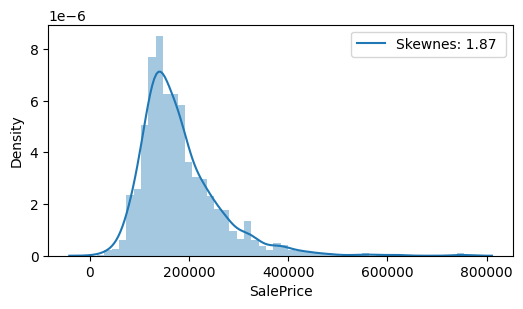

In [18]:
plt.figure(figsize=(6,3)) #画布在matplotlib中就是一个figure，是一个图形的对象。
bar = sns.distplot(train['SalePrice']) #直方图
bar.legend(['Skewnes: {:.2f} '.format(train['SalePrice'].skew())])  #legend()函数是matplotlib中最常用的一个函数,可以用于添加图例,主要应用于绘制简单的折线图、散点图等
                                                        #调用skew()和kurt()函数计算SalePrice具体的偏度和峰度值。
plt.show()

In [19]:
corr = train.corr(method="pearson",numeric_only=True) 
#pearson皮尔逊相关系数；用于度量两个变量X和Y之间的相关（线性相关），其值介于-1与1之间。
#corr(method = 'spearman')，斯皮尔曼等级相关系数，用来分析非正态分布的数据； 将两要素的样本值按数据的大小顺序排列位次，以各要素样本值的位次代替实际数据而求得的一种统计量
#corr(method = 'kendall')，秩相关系数，用来分析两定序变量相关关系；
#print( abs(corr['SalePrice']) > 0.5)
high_corr_features = corr.index[abs(corr['SalePrice']) > 0.5]  #重点关注与SalePrice相关性最强的 10 个特征。
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object') 

No. of Highly Corrolated Features: 11


Text(45.72222222222221, 0.5, 'Features')

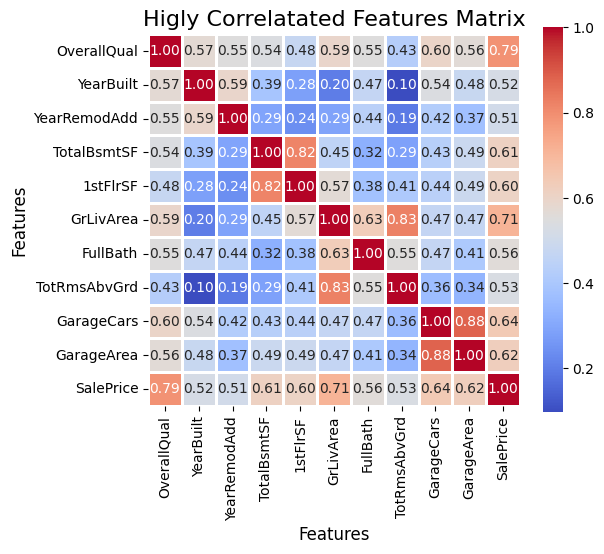

In [20]:
plt.figure(figsize=(6,5))   
sns.heatmap(train[high_corr_features].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True, linewidths=2) # 相关关系矩阵热力图

plt.title('Higly Correlatated Features Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

#与SalePrice高度相关的特征
#OverallQual（房子材料和装饰）、GrLivArea（地上居住面积）、GarageCars（车库容量）和 TotalBsmtSF（地下室面积）跟SalePrice有很强的相关性

## FEATURE ENGINEERING

In [21]:
train = pd.get_dummies(train, drop_first=True)   #pandas.get_dummies()是用于数据处理的。它将分类数据转换为虚拟变量或指标变量; drop_first：布尔值，默认为 False 是否通过删除第一级从 k 个分类级别中取出 k-1 个虚拟变量。
test = pd.get_dummies(test, drop_first=True)  
train.shape   
test.shape

(1459, 227)

In [22]:
len(train.select_dtypes(include='object').columns)

0

In [23]:
len(test.select_dtypes(include='object').columns)

0

## SPLITTING DATASET

In [24]:
corr = train.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.52] #重点关注与SalePrice相关性最强的的特征。
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'ExterQual_TA'],
      dtype='object') 

No. of Highly Corrolated Features: 11


In [25]:
#从features中将训练集和测试集重新分离出来，构造最终的训练数据。
X = train[high_corr_features.drop('SalePrice')]      
y = train[['SalePrice']] 
print(X)
print(y) 


      OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
0               7       2003          856       856       1710         2   
1               6       1976         1262      1262       1262         2   
2               7       2001          920       920       1786         2   
3               7       1915          756       961       1717         1   
4               8       2000         1145      1145       2198         2   
...           ...        ...          ...       ...        ...       ...   
1455            6       1999          953       953       1647         2   
1456            6       1978         1542      2073       2073         2   
1457            7       1941         1152      1188       2340         2   
1458            5       1950         1078      1078       1078         1   
1459            5       1965         1256      1256       1256         1   

      TotRmsAbvGrd  GarageCars  GarageArea  ExterQual_TA  
0                8          

In [ ]:
test = test[high_corr_features.drop('SalePrice')] 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) #train_test_split()是sklearn.model_selection中的分离器函数，⽤于将数组或矩阵划分为训练集和测试集，

In [ ]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_val',X_val.shape)    #Printing the X_test Features Shape
print(f'y_val',y_val.shape)    #Printing the y_test Labels  Shape

In [ ]:
test.fillna(test.mode().iloc[0], inplace=True) 


In [ ]:
#normalise data 正常化
ss = StandardScaler() #处理数据归一化和标准化。
X_train = ss.fit_transform(X_train) #在fit的基础上，进行标准化，降维，归一化等操作
X_val = ss.transform(X_val)
test = ss.transform(test)
print(X_val)

## BUILDNG MODEL

In [ ]:
#构建模型 和 随机森林回归模型  RandomForestRegressor 

# Model Building
clf_rfr = RandomForestRegressor(random_state=0)   #Creating the Random Forest Regressor Model
clf_rfr.fit(X_train, y_train)                     #Training the Model with X_train & y_train
pred = clf_rfr.predict(X_val)                    #Predicting the X_test 

#Testing the model accuracy with different paramtes 用不同参数测试模型精度
r2   = r2_score(y_val, pred)             # Getting the R-squared (R²) 得到R平方（R²）
mae  = mean_absolute_error(y_val, pred)  # Getting the Mean Absolute Error  获得平均绝对误差
mse  = mean_squared_error(y_val, pred)   # Getting the Mean Squared Error 求均方误差
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error 求均方根误差


#Defining a DataFrame 
rfr_results = pd.DataFrame([['Random Forest Regressor', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
print(rfr_results)

#result =rfr_results.append(rfr_results, ignore_index=True)
#Printing the Model Results with different Metrics
#result

In [ ]:
#预测和提交

predict1 = clf_rfr.predict(test) 
  
output = pd.DataFrame({'Id': Id, "PRICE":predict1})
output.to_csv('submission_house_price.csv', index=False)

print("Your submission was successfully saved!")